In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import math

In [5]:
#import numpy as geek  

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas_datareader as web

In [8]:
import statsmodels.api as sm

In [9]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [10]:
stock = 'fb'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.50
invest = 100
years_of_data_to_process = 25

In [11]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
#print (date)
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

In [12]:
data =  yf.download(stock, start=start)

[*********************100%***********************]  1 of 1 completed


In [13]:
#data = web.DataReader(stock, data_source='yahoo', start = start, end = '2008-7-14')

In [14]:
df = data["Close"].pct_change() * 100

In [15]:
df = df.rename("Today_Change_%")
df = df.reset_index()

In [16]:
df1 = pd.merge(data,df, on="Date")
#df1

In [17]:
#df1.dropna(inplace= True)
df1.insert(7,'Volume_Lag', None)
df1.Volume = df1.Volume.pct_change() * 100
#df1.Volume = df1.Volume *  geek.sign(df1.Volume.values)
df1['Volume_Lag'] = df1.Volume.shift(1).values


In [18]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))

In [19]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

In [20]:
df1['Close-Open'] =  df1['Close'] - df1['Open']
df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)

In [21]:
df1['High-Low'] =  df1['High'] - df1['Low']
df1['High-Low_Lag'] = df1['High-Low'].shift(1)

In [22]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [23]:
df1.dropna(inplace= True)

In [24]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [25]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [26]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [27]:
#crossovers = pd.DataFrame()
#crossovers['Dates'] = Short_MV_Avg_Span['Date']
#crossovers['Price'] = [i for i in df1.Close]
#crossovers['Short_MV_Avg_Span'] = Short_MV_Avg_Span['Close']
#crossovers['Long_MV_Avg_Span'] = Long_MV_Avg_Span['Close']
#crossovers

In [28]:
df1.dropna(inplace= True)
df1.tail(20)

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,...,Trend_Lag,Close-Open,Close-Open_Lag,High-Low,High-Low_Lag,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
2271,1.0,2021-05-28,331.000000,332.869995,328.329987,328.730011,328.730011,-41.217031,111.395803,-1.208111,...,0.853276,-2.269989,4.750000,4.540009,7.019989,0,318.361373,307.200303,11.161070,10.948398
2272,1.0,2021-06-01,330.149994,331.420013,326.640015,329.130005,329.130005,-2.255470,-41.217031,0.121679,...,0.088111,-1.019989,-2.269989,4.779999,4.540009,1,319.386957,308.060291,11.326666,11.161070
2273,1.0,2021-06-02,330.380005,331.869995,327.119995,329.149994,329.149994,-0.948504,-2.255470,0.006073,...,0.520919,-1.230011,-1.019989,4.750000,4.779999,1,320.316770,308.887338,11.429432,11.326666
2274,1.0,2021-06-03,325.779999,327.380005,323.480011,326.040009,326.040009,8.207271,-0.948504,-0.944854,...,0.427368,0.260010,-1.230011,3.899994,4.750000,0,320.861841,309.559992,11.301848,11.429432
2275,1.0,2021-06-04,325.899994,332.459991,325.179993,330.350006,330.350006,5.381102,8.207271,1.321923,...,0.656411,4.450012,0.260010,7.279999,3.899994,1,321.765475,310.375287,11.390189,11.301848
2276,1.0,2021-06-07,329.480011,337.690002,328.929993,336.579987,336.579987,51.524523,5.381102,1.885873,...,0.710167,7.099976,4.450012,8.760010,7.279999,1,323.176381,311.402922,11.773459,11.390189
2277,1.0,2021-06-08,336.700012,338.299988,332.239990,333.679993,333.679993,-27.592406,51.524523,-0.861606,...,0.873286,-3.020020,7.099976,6.059998,8.760010,0,324.176725,312.276533,11.900192,11.773459
2278,1.0,2021-06-09,335.739990,336.799988,330.000000,330.250000,330.250000,-5.847536,-27.592406,-1.027929,...,0.237624,-5.489990,-3.020020,6.799988,6.059998,0,324.755132,312.981375,11.773758,11.900192
2279,1.0,2021-06-10,330.790009,333.940002,328.549988,332.459991,332.459991,-3.552619,-5.847536,0.669187,...,0.036765,1.669983,-5.489990,5.390015,6.799988,1,325.488928,313.745242,11.743687,11.773758
2280,1.0,2021-06-11,332.579987,332.829987,328.929993,331.260010,331.260010,2.626093,-3.552619,-0.360940,...,0.725416,-1.319977,1.669983,3.899994,5.390015,0,326.038555,314.432095,11.606460,11.743687


In [29]:
X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

<function matplotlib.pyplot.show(close=None, block=None)>

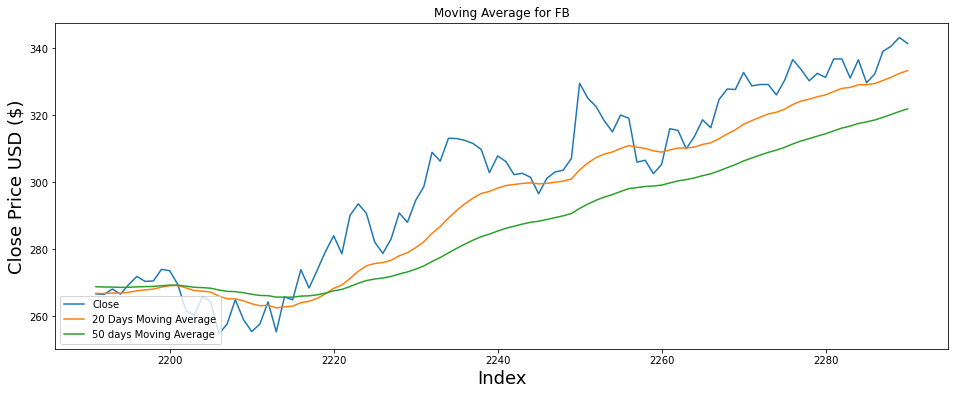

In [30]:
df1['Close'][-100:].plot(figsize=(16,6))
df1['Short_MV_Avg_Span'][-100:].plot(figsize=(16,6))
df1['Long_MV_Avg_Span'][-100:].plot(figsize=(16,6))
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.legend(['Close', str(short_moving_average_span) + ' Days Moving Average', str(long_moving_average_span) + ' days Moving Average'], loc = 'lower left')
plt.title("Moving Average for " + stock.upper())
plt.show

In [31]:
y = df1["Up_Down"].values

In [32]:
model = sm.Logit(y,X)

In [33]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.689210
         Iterations 4


In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2288
Model:                          Logit   Df Residuals:                     2282
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:                0.003636
Time:                        22:14:32   Log-Likelihood:                -1576.9
converged:                       True   LL-Null:                       -1582.7
Covariance Type:            nonrobust   LLR p-value:                   0.04215
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3218      0.115      2.787      0.005       0.096       0.548
Trend_Lag                                 -0.4192      0.186     -2.254      0.024      -0.784      -0.055
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag    -0.0062      0.010     -0.650      0.515      -0.025       0.013
Close-Open_Lag                            -0.0067      0.024     -0.282      0.778      -0.053       0.040
High-Low_Lag                               0.0053      0.016      0.330      0.741      -0.026       0.037
Volume_Lag                                -0.0003      0.001     -0.324      0.746      -0.002       0.001
==========================================================================================================
"""

In [35]:
prediction = result.predict(X)

In [36]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [37]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [38]:
y = df1["Up_Down"].values

In [39]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [40]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,328,755
Up,326,879


In [41]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.527534965034965


In [42]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.6151885830784913


In [43]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1

In [44]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [45]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,22], money, share)
    df1.iloc[i,23] = share
    df1.iloc[i,24] = money

In [46]:
#df1.tail(10)

In [47]:
print("\nIf ${:,.2f} was invested in [ {} ], and Just Hold and Not Trade for {:,} years, the ROI = ${:,.2f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 0] * data.iloc[-1,0]))


If $100.00 was invested in [ FB ], and Just Hold and Not Trade for 10 years, the ROI = $814.72


In [48]:
print ("\nIf ${:,.2f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.2f}".format(invest, diff_years, (money + (share * df1.iloc[-1,5]))))


If $100.00 was invested 10 years ago, buy and sell according this script's recommandation, the ROI = $981.79


In [49]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
2276 2021-06-07                       Up              Down
2277 2021-06-08                     Down              Down
2278 2021-06-09                     Down                Up
2279 2021-06-10                       Up                Up
2280 2021-06-11                     Down              Down
2281 2021-06-14                       Up                Up
2282 2021-06-15                     Down              Down
2283 2021-06-16                     Down                Up
2284 2021-06-17                       Up                Up
2285 2021-06-18                     Down              Down
2286 2021-06-21                       Up                Up
2287 2021-06-22                       Up              Down
2288 2021-06-23                       Up              Down
2289 2021-06-24                       Up                Up
2290 2021-06-25                     Down                Up


In [50]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])

In [51]:
#print(df1.iloc[len(df1)-1,[1,7,10,11,12,13,14,15,16,17,18,19,20,21,22]])
#df1.info()

In [52]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,16] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,22] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,16] == df1.iloc[-1,22]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ FB ] actually went down, --- base on yesterday's data, We Predication [ FB ] should be going up.

=========> Actual and Predication DO NOT match <=========


In [53]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [54]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.689797
         Iterations 4


In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 2167
Model:                          Logit   Df Residuals:                     2161
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:                0.002663
Time:                        22:14:33   Log-Likelihood:                -1494.8
converged:                       True   LL-Null:                       -1498.8
Covariance Type:            nonrobust   LLR p-value:                    0.1573
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2937      0.118      2.486      0.013       0.062       0.525
Trend_Lag                                 -0.4027      0.191     -2.108      0.035      -0.777      -0.028
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag    -0.0031      0.010     -0.303      0.762      -0.023       0.017
Close-Open_Lag                             0.0040      0.026      0.151      0.880      -0.047       0.055
High-Low_Lag                               0.0116      0.018      0.647      0.518      -0.023       0.047
Volume_Lag                                -0.0004      0.001     -0.450      0.653      -0.002       0.001
==========================================================================================================
"""

In [56]:
#print(result.summary().as_csv())

In [57]:
#summary_list=result.summary().as_csv().split(",")

In [58]:
#print(summary_list)

In [59]:
#print(summary_list[37:39])

In [60]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,9,50
Up,1,61


In [61]:
z = confusion_matrix(y_test,prediction)

In [62]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5785 <=========



In [63]:
prediction = result.predict(x_test)
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], df1.iloc[-1, 19], df1.iloc[-1, 12], df1.iloc[-1, 14], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.5359,   [ FB ] will go up! <=========


In [64]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,19], df1.iloc[-4,19], df1.iloc[-3,19], df1.iloc[-2,19],df1.iloc[-1,19]))
if df1.iloc[-1,19] * df1.iloc[-2,19] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,19] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> 10.8738....10.9857....11.1293....11.3577....11.4124....<=============

 ============> No Trading Waring at this time! <=============


In [65]:
#df1.to_csv('fb.csv', index = False)